In [136]:
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA

### Definir la data

In [144]:
path = 'datos/energy_dataset.csv'
dataf = pd.read_csv(path)

In [145]:
dataf['time'] = pd.to_datetime(dataf['time'], utc=True, infer_datetime_format=True) 

In [139]:
dataf['time'].head()

0   2014-12-31 23:00:00+00:00
1   2015-01-01 00:00:00+00:00
2   2015-01-01 01:00:00+00:00
3   2015-01-01 02:00:00+00:00
4   2015-01-01 03:00:00+00:00
Name: time, dtype: datetime64[ns, UTC]

In [140]:
dataf.time = dataf.time.dt.strftime("%Y/%m/%d %I:%M:%S")

In [147]:
dataf['Año'] = dataf.time.dt.year

In [146]:
dataf['Mes'] = dataf.time.dt.month

In [154]:
dataf.groupby(['Año','Mes'])['price actual'].mean()

Año   Mes
2014  12     65.410000
2015  1      64.898763
      2      56.412991
      3      55.478562
      4      58.402806
      5      57.312755
      6      65.987931
      7      71.046452
      8      64.022231
      9      60.250208
      10     59.404516
      11     60.739625
      12     61.881895
2016  1      45.562594
      2      36.732601
      3      36.806882
      4      32.608194
      5      34.735793
      6      46.285639
      7      47.492688
      8      47.590255
      9      50.427694
      10     60.202366
      11     62.592694
      12     67.601304
2017  1      79.505524
      2      59.802128
      3      50.925121
      4      51.726319
      5      53.818454
      6      56.245042
      7      55.250497
      8      54.077406
      9      55.828181
      10     63.937769
      11     65.457181
      12     65.077352
2018  1      56.569691
      2      60.864360
      3      48.260013
      4      50.414750
      5      61.691035
      6      64.335653
 

In [150]:
datos_arima = dataf.groupby(['Año','Mes'])['price actual'].mean()

In [155]:
datos_arima.values

array([65.41      , 64.89876344, 56.41299107, 55.47856183, 58.40280556,
       57.31275538, 65.98793056, 71.04645161, 64.02223118, 60.25020833,
       59.40451613, 60.739625  , 61.88189516, 45.56259409, 36.73260057,
       36.80688172, 32.60819444, 34.73579301, 46.28563889, 47.49268817,
       47.59025538, 50.42769444, 60.20236559, 62.59269444, 67.60130376,
       79.50552419, 59.80212798, 50.92512097, 51.72631944, 53.8184543 ,
       56.24504167, 55.25049731, 54.07740591, 55.82818056, 63.93776882,
       65.45718056, 65.07735215, 56.56969086, 60.86436012, 48.26001344,
       50.41475   , 61.69103495, 64.33565278, 67.77989247, 70.37405914,
       76.89788889, 70.38794355, 66.61741667, 67.03843876])

In [112]:
dataf.set_index(dataf['time'], drop=True, inplace=True)

In [113]:
dataf.drop('time', axis=1, inplace=True)

In [116]:
dataf.dropna(inplace=True, axis=1, thresh=2)

In [132]:
dataf.dropna(inplace=True)

In [115]:
dataf[['total load actual', 'price actual']].corr()

,total load actual,price actual
total load actual,1.000000,0.436127
price actual,0.436127,1.000000


In [53]:
import matplotlib.pyplot as plt


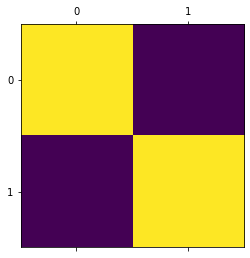

In [78]:
plt.matshow(dataf[['total load actual', 'price actual']].corr())
plt.show()

In [91]:
size_dataf = len(dataf['total load actual'])

<AxesSubplot:xlabel='time'>

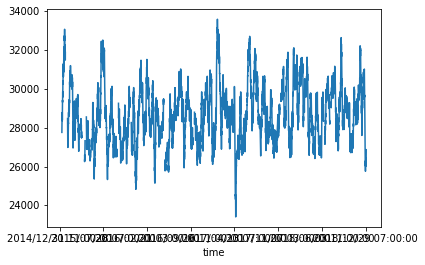

In [85]:
dataf['total load actual'].rolling(150).mean().plot()

In [120]:
dataf_train = dataf['total load actual'].iloc[:int(size_dataf*0.7)]
dataf_valid = dataf['total load actual'].iloc[int(size_dataf*0.7):]

In [89]:
len(dataf['total load actual'])

35064

In [93]:
int(size_dataf*0.7)

24544

In [97]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

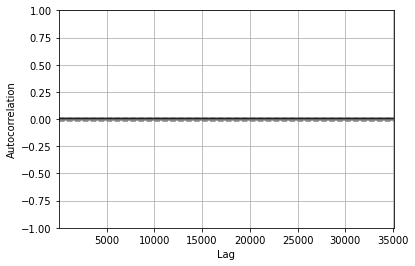

In [98]:
autocorrelation_plot(dataf['total load actual'])

In [123]:
model = ARIMA(dataf_train, order=(5,1,0))

In [122]:
dataf_train.index = pd.DatetimeIndex(dataf_train.index).to_period('M')


In [124]:
model_fit = model.fit(disp=0)

In [125]:
print(model_fit.summary())

                              ARIMA Model Results                              
Dep. Variable:     D.total load actual   No. Observations:                24543
Model:                  ARIMA(5, 1, 0)   Log Likelihood             -203642.054
Method:                        css-mle   S.D. of innovations            971.070
Date:                 Wed, 18 Nov 2020   AIC                         407298.108
Time:                         10:33:47   BIC                         407354.866
Sample:                     01-31-2015   HQIC                        407316.495
                          - 10-31-2017                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1090     11.628      0.009      0.993     -22.681      22.899
ar.L1.D.total load actual     0.7707      0.006    122.296      0.000       0.

<AxesSubplot:xlabel='time'>

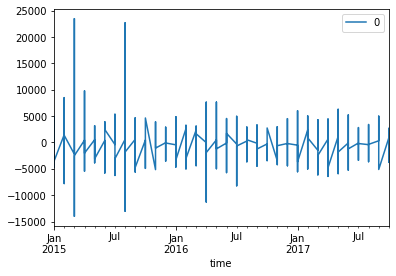

In [127]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

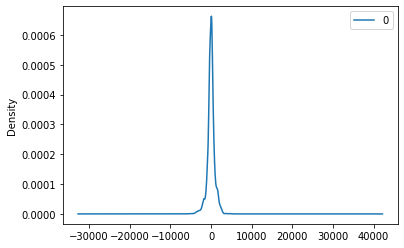

                  0
count  24543.000000
mean      -0.048785
std      971.103330
min   -14011.684474
25%     -402.125539
50%       16.087002
75%      417.483236
max    23457.483248


In [128]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [133]:
dataf['total load actual'].count()

35017

In [158]:
from sklearn.metrics import mean_squared_error


[65.41       64.89876344 56.41299107 55.47856183 58.40280556 57.31275538
 65.98793056 71.04645161 64.02223118 60.25020833 59.40451613 60.739625
 61.88189516 45.56259409 36.73260057 36.80688172 32.60819444 34.73579301
 46.28563889 47.49268817 47.59025538 50.42769444 60.20236559 62.59269444
 67.60130376 79.50552419 59.80212798 50.92512097 51.72631944 53.8184543
 56.24504167 55.25049731 54.07740591 55.82818056 63.93776882 65.45718056
 65.07735215 56.56969086 60.86436012 48.26001344 50.41475    61.69103495
 64.33565278 67.77989247 70.37405914 76.89788889 70.38794355 66.61741667
 67.03843876]
predicted=53.642869, expected=54.077406
predicted=53.697238, expected=55.828181
predicted=55.712096, expected=63.937769
predicted=65.807068, expected=65.457181
predicted=63.866745, expected=65.077352
predicted=65.514805, expected=56.569691
predicted=52.561543, expected=60.864360
predicted=64.267686, expected=48.260013
predicted=44.749507, expected=50.414750
predicted=53.631889, expected=61.691035
predi

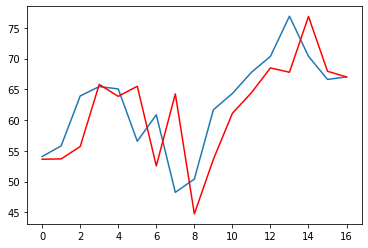

In [160]:
X = datos_arima.values
print(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()